<a href="https://colab.research.google.com/github/Chi68P1/AI/blob/main/AI_ANN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.cifar10 import load_data

(x_train, y_train), (x_test, y_test) = load_data()

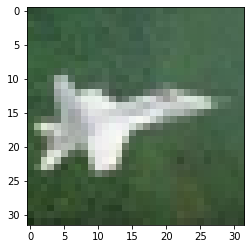

[0]


In [ ]:
import matplotlib.pyplot as plt
hinh = x_train[77]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print(y_train[77])

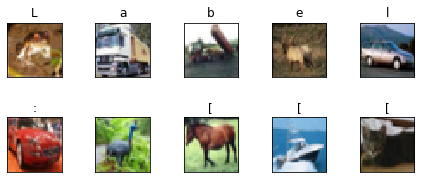

In [ ]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation='none')
  plt.title("Label: {}".format(x_test)[i])
  plt.xticks([])
  plt.yticks([])
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               1573376   
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("x_test: {}x{}x{}".format(x_test.shape[0],x_test.shape[1],x_test.shape[2]))

In [ ]:
import tensorflow as tf
model.save("model1.h5")

In [ ]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

In [ ]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss',test_loss)

Epoch 1/10
391/391 [==============================] - 19s 46ms/step - loss: 2.0393 - accuracy: 0.2635
Epoch 2/10
391/391 [==============================] - 20s 52ms/step - loss: 1.7893 - accuracy: 0.3537
Epoch 3/10
391/391 [==============================] - 18s 46ms/step - loss: 1.6970 - accuracy: 0.3889
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 1.6273 - accuracy: 0.4180
Epoch 5/10
391/391 [==============================] - 23s 60ms/step - loss: 1.5748 - accuracy: 0.4356
Epoch 6/10
391/391 [==============================] - 26s 67ms/step - loss: 1.5384 - accuracy: 0.4504
Epoch 7/10
391/391 [==============================] - 22s 56ms/step - loss: 1.4969 - accuracy: 0.4642
Epoch 8/10
391/391 [==============================] - 25s 64ms/step - loss: 1.4652 - accuracy: 0.4757
Epoch 9/10
391/391 [==============================] - 17s 43ms/step - loss: 1.4415 - accuracy: 0.4840
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 1.4842 

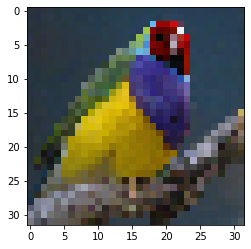

In [ ]:
from keras.utils import load_img
import matplotlib.pyplot as plt
img = load_img('bird_small.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 144ms/step


array([6])